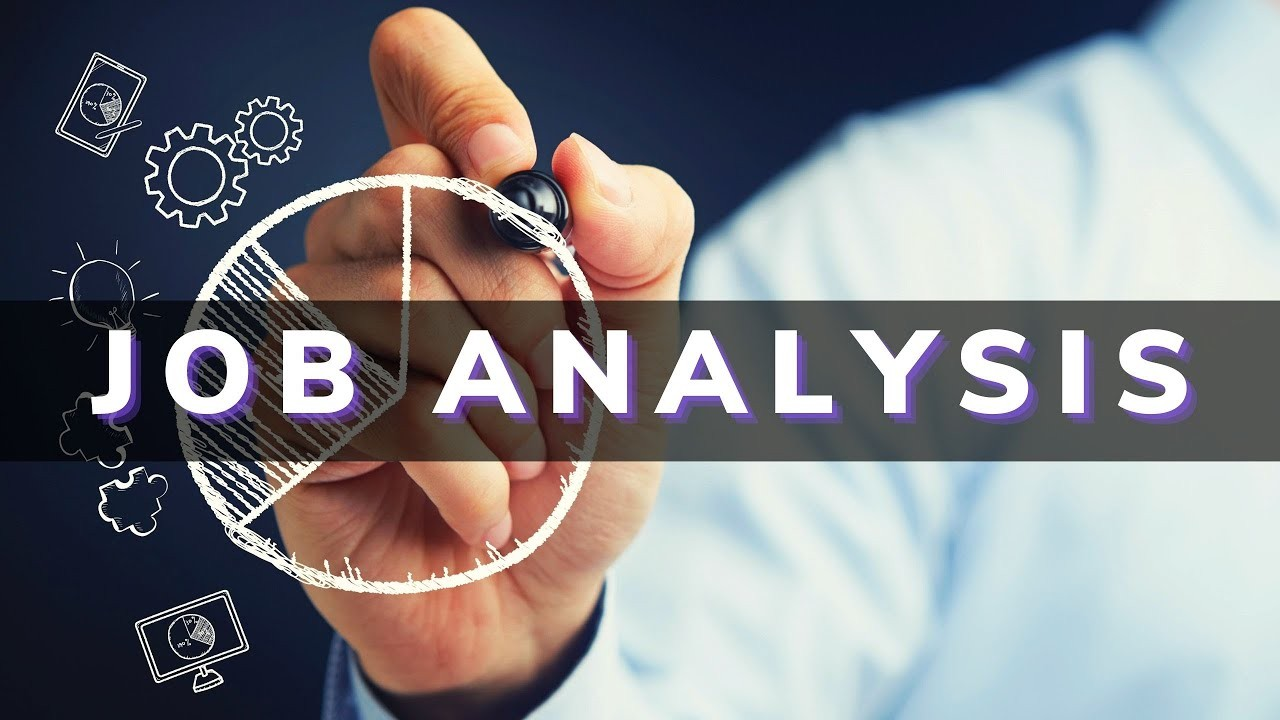

Voici quelques analyses que vous pouvez effectuer sur ce dataset :

### 1. **Analyse des salaires**
   - **Comparaison des salaires entre les entreprises** : Calculer les salaires moyens, minimums et maximums pour chaque entreprise.
   - **Répartition des salaires** : Comparer les fourchettes de salaire par localisation ou par entreprise pour identifier les différences.
   - **Analyse des salaires par poste** : Évaluer les différences de salaire pour les différents intitulés de poste.

### 2. **Analyse de la localisation**
   - **Répartition des offres par localisation** : Voir combien d'offres sont basées dans chaque localisation.
   - **Impact de la localisation sur le salaire** : Comparer les salaires proposés pour les mêmes postes dans différentes localisations.

### 3. **Analyse des scores d'entreprise**
   - **Classement des entreprises** : Trier les entreprises en fonction de leurs scores pour identifier les mieux notées.
   - **Relation entre le score et le salaire** : Voir s'il existe une corrélation entre le score d'une entreprise et le salaire offert.

### 4. **Analyse des titres de poste**
   - **Répartition des postes** : Identifier les postes les plus fréquents.
   - **Comparaison des salaires par poste** : Évaluer les salaires moyens, minimums et maximums par titre de poste.

### 5. **Analyse des tendances**
   - **Tendances des stages d'été vs stages d'automne** : Comparer les salaires et les offres entre les stages d'été et d'automne.

### 6. **Analyse des estimations d'employeur vs estimations Glassdoor**
   - **Comparaison des estimations** : Comparer les fourchettes de salaire estimées par l'employeur avec celles fournies par Glassdoor pour évaluer les divergences.

Ces analyses peuvent fournir des insights précieux sur les opportunités de stage et les tendances du marché dans le domaine des données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/jobs.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Company,Company Score,Job Title,Location,Salary
0,PepsiCo,3.9,2025 Summer Intern: R&D,"Plano, TX",$21.50 - $55.40 Per Hour (Employer est.)
1,ghSMART,4.8,Data Engineer Intern,Remote,$20.00 - $30.00 Per Hour (Employer est.)
2,PepsiCo,3.9,2025 Summer Intern: eCommerce Data Science,United States,$21.50 - $40.19 Per Hour (Employer est.)
3,U.S. Bank National Association,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",$20.63 - $30.25 Per Hour (Employer est.)
4,Plymouth Rock Assurance,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",$77K - $130K (Glassdoor est.)


## Data Comprehension

Voici ce que représente chaque colonne du dataset :

1. **Company** : Le nom de l'entreprise qui offre le poste.

2. **Company Score** : La note moyenne de l'entreprise, généralement basée sur les avis des employés ou des utilisateurs d'une plateforme de notation (comme Glassdoor). Cette note est souvent sur une échelle de 1 à 5.

3. **Job Title** : Le titre du poste ou du stage proposé par l'entreprise.

4. **Location** : L'emplacement géographique du poste. Cela peut inclure la ville, l'état ou indiquer si le poste est en télétravail (remote).

5. **Salary** : La fourchette de salaire proposée pour le poste, exprimée soit en taux horaire, soit en salaire annuel (généralement en milliers de dollars). Certaines informations peuvent être accompagnées d'une estimation indiquée par des plateformes comme "Employer est." ou "Glassdoor est." pour préciser que le salaire est une estimation.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        648 non-null    object 
 1   Company Score  551 non-null    float64
 2   Job Title      649 non-null    object 
 3   Location       642 non-null    object 
 4   Salary         503 non-null    object 
dtypes: float64(1), object(4)
memory usage: 25.5+ KB


#### **a. Dimensions du Dataset**
- **Nombre total d'enregistrements (entrées)** : 649.
- **Nombre total de colonnes** : 5.

#### **b. Colonnes et Types de Données**
1. **Company** (`object`):
   - **Description** : Nom de l'entreprise offrant le poste.
   - **Non-null** : 648/649 (1 valeur manquante).

2. **Company Score** (`float64`):
   - **Description** : Note moyenne de l'entreprise (probablement sur une échelle de 1 à 5).
   - **Non-null** : 551/649 (98 valeurs manquantes).

3. **Job Title** (`object`):
   - **Description** : Titre du poste ou du stage.
   - **Non-null** : 649/649 (aucune valeur manquante).

4. **Location** (`object`):
   - **Description** : Localisation géographique du poste (ville, état ou télétravail).
   - **Non-null** : 642/649 (7 valeurs manquantes).

5. **Salary** (`object`):
   - **Description** : Fourchette de salaire proposée, exprimée en taux horaire ou en salaire annuel.
   - **Non-null** : 503/649 (146 valeurs manquantes).

#### **c. Observations Générales**
- **Complétude** :
  - **Job Title** est entièrement rempli.
  - **Company Score** et **Salary** ont un nombre significatif de valeurs manquantes (environ 15% pour Company Score et 23% pour Salary).

- **Types de Données** :
  - **Company Score** est numérique (`float64`), ce qui facilite les analyses statistiques.
  - Les autres colonnes sont de type texte (`object`), nécessitant un nettoyage ou une transformation pour certaines analyses (comme le salaire).

In [5]:
df.isna().sum()

Company            1
Company Score     98
Job Title          0
Location           7
Salary           146
dtype: int64

- Il manque une valeur dans la colonne Company.
- Company Score a 98 valeurs manquantes, ce qui pourrait influencer les analyses si ces valeurs ne sont pas traitées.
- Location a 7 valeurs manquantes.
- Salary est la colonne la plus affectée avec 146 valeurs manquantes.

In [6]:
df.duplicated().sum()

0

# Nettoyage

In [7]:
# Remplir les valeurs manquantes
df['Company'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)
df['Company Score'].fillna(df['Company Score'].mean(), inplace=True)

# Supprimer les lignes avec des salaires manquants
df.dropna(subset=['Salary'], inplace=True)

# Fonction pour nettoyer et convertir les salaires
def parse_salary(salary):
    # Vérifier si salary est une chaîne de caractères
    if isinstance(salary, str):
        # Suppression des symboles et normalisation des espaces
        salary = salary.replace('$', '').replace('K', '000').replace('Per Hour', '').replace('Glassdoor est.', '').replace('Employer est.', '').replace("\xa0", "").strip()
        
        # Supprimer les caractères spéciaux ou non désirés comme les parenthèses
        salary = salary.replace('()', '').strip()
        
        # Vérifier si c'est une plage de valeurs (avec "-")
        if ' - ' in salary:
            salary_range = salary.split(' - ')
            # Prendre la moyenne des deux valeurs
            salary_min = float(salary_range[0].replace(",", "").strip())
            salary_max = float(salary_range[1].replace(",", "").strip())
            return (salary_min + salary_max) / 2
        else:
            # Si c'est une seule valeur, convertir directement en float
            return float(salary.replace(",", "").strip())
    # Si salary est déjà un float, le retourner tel quel
    return salary

# Appliquer la fonction de nettoyage sur la colonne Salary
df['Salary'] = df['Salary'].apply(parse_salary)

# Afficher les informations sur le DataFrame nettoyé
df.info()

# Afficher les premières lignes du DataFrame nettoyé
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 502
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        503 non-null    object 
 1   Company Score  503 non-null    float64
 2   Job Title      503 non-null    object 
 3   Location       503 non-null    object 
 4   Salary         503 non-null    float64
dtypes: float64(2), object(3)
memory usage: 23.6+ KB


,Company,Company Score,Job Title,Location,Salary
0,PepsiCo,3.9,2025 Summer Intern: R&D,"Plano, TX",38.450
1,ghSMART,4.8,Data Engineer Intern,Remote,25.000
2,PepsiCo,3.9,2025 Summer Intern: eCommerce Data Science,United States,30.845
3,U.S. Bank National Association,3.6,2025 Data Analytics Summer Intern,"Minneapolis, MN",25.440
4,Plymouth Rock Assurance,3.4,Fall 2024 Data Science/Predictive Modeler Intern,"Woodbridge, NJ",103500.000


# Analyse des salaires par entreprise

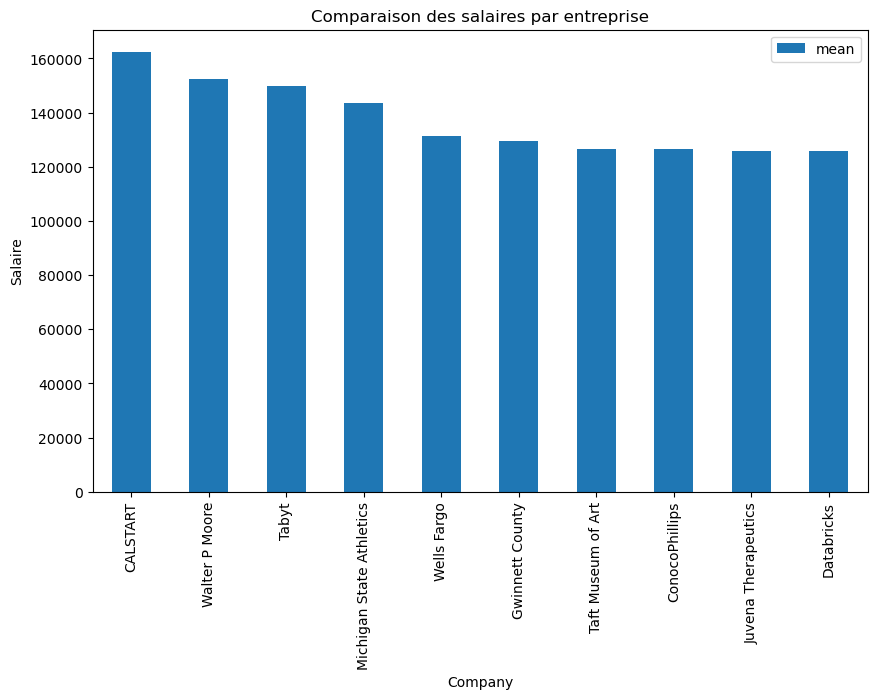

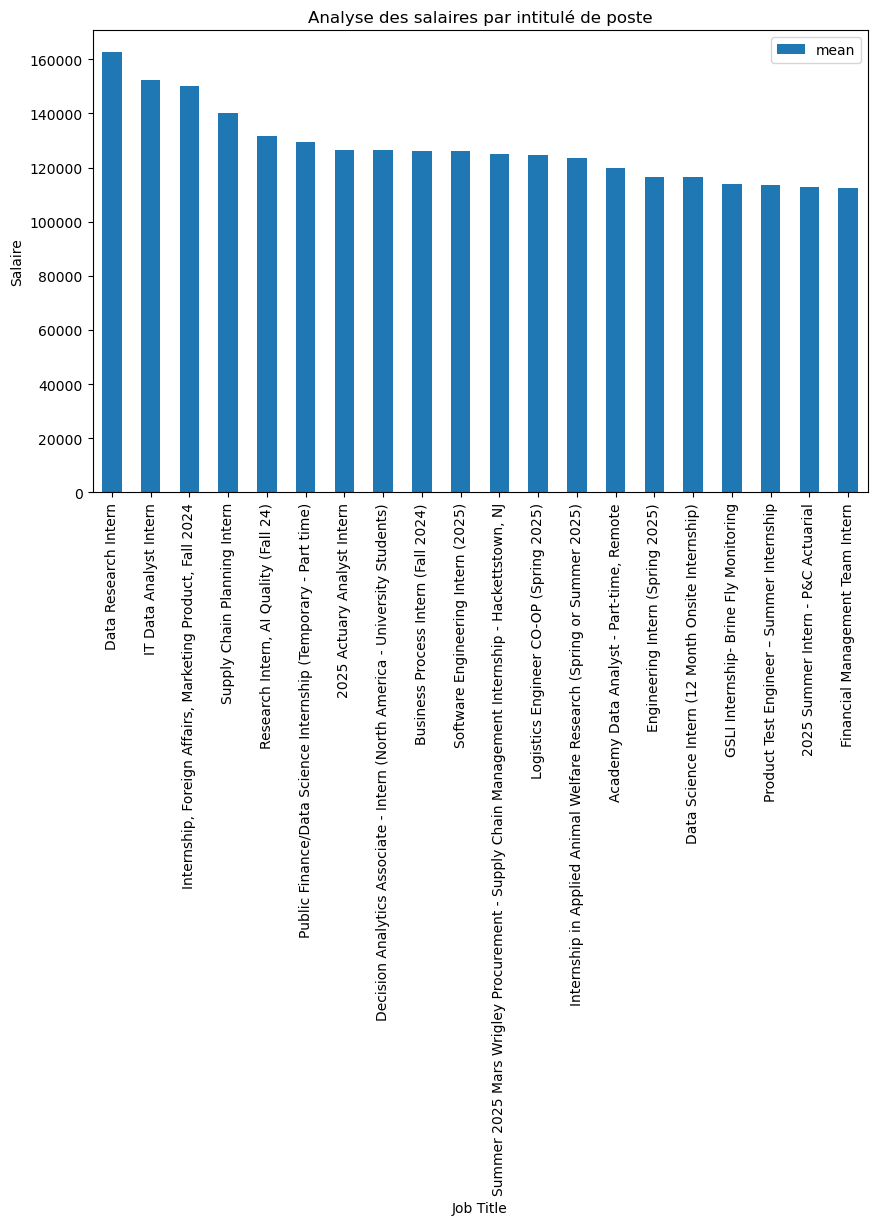

In [9]:
# 1.1 Comparaison des salaires entre les entreprises
salary_by_company = df.groupby('Company')['Salary'].agg(['mean']).sort_values(by='mean', ascending=False).head(10)
salary_by_company.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des salaires par entreprise')
plt.ylabel('Salaire')
plt.show()


# 1.2 Analyse des salaires par poste
salary_by_job_title = df.groupby('Job Title')['Salary'].agg(['mean']).sort_values(by='mean', ascending=False)
salary_by_job_title.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Analyse des salaires par intitulé de poste')
plt.ylabel('Salaire')
plt.show()


# Analyse de la localisation

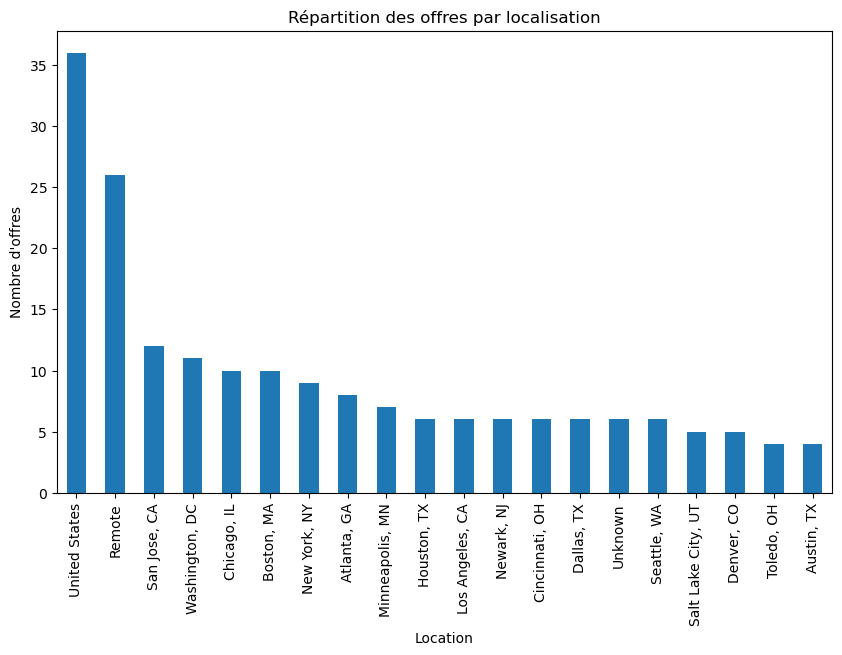

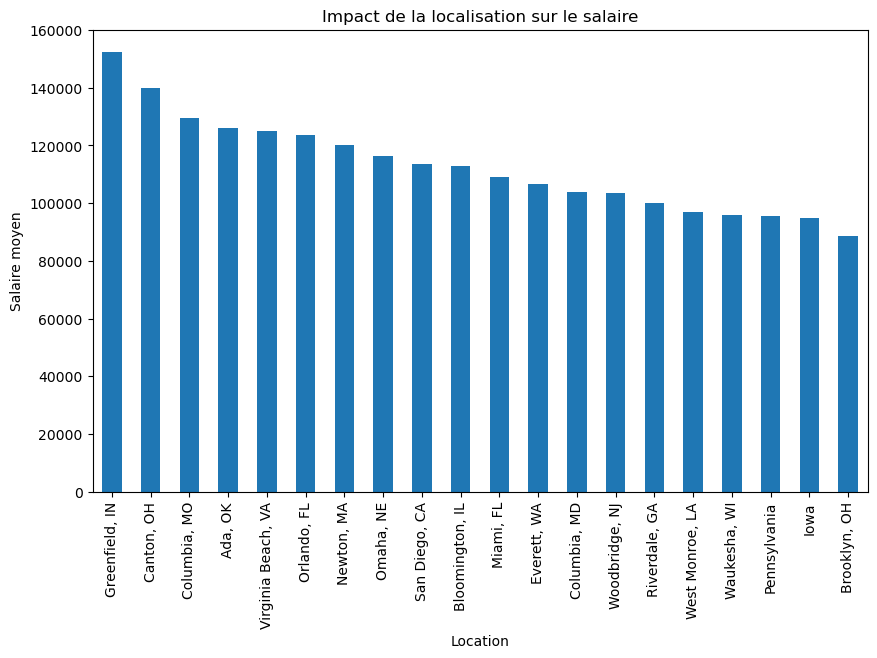

In [10]:
# 2.1 Répartition des offres par localisation
offers_by_location = df['Location'].value_counts()
offers_by_location.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Répartition des offres par localisation')
plt.ylabel('Nombre d\'offres')
plt.show()

# 2.2 Impact de la localisation sur le salaire
salary_by_location = df.groupby('Location')['Salary'].mean().sort_values(ascending=False)
salary_by_location.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Impact de la localisation sur le salaire')
plt.ylabel('Salaire moyen')
plt.show()


# Analyse des scores d'entreprise 

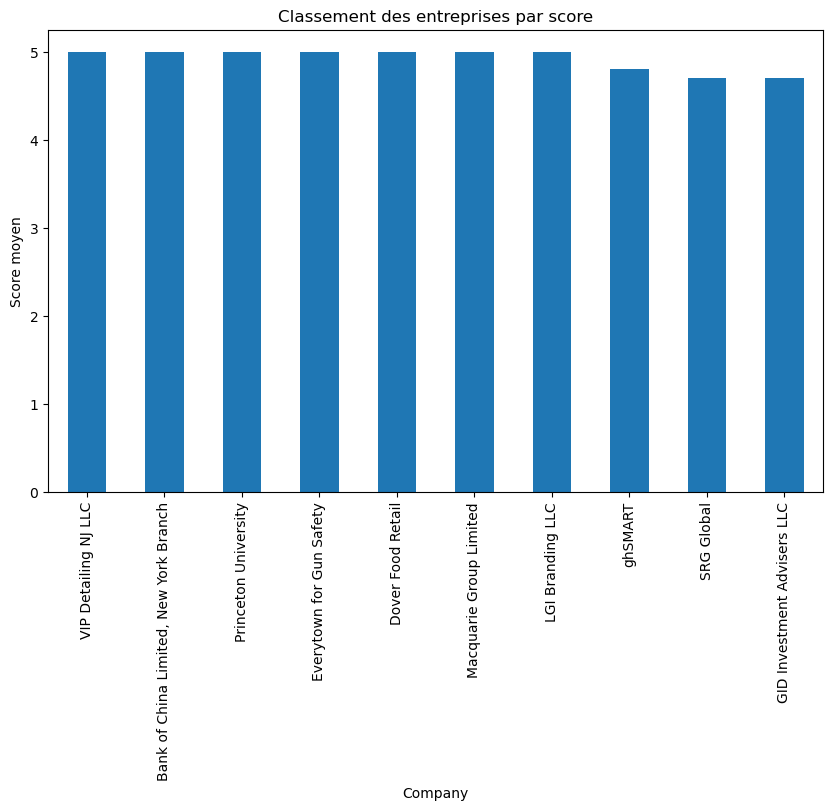

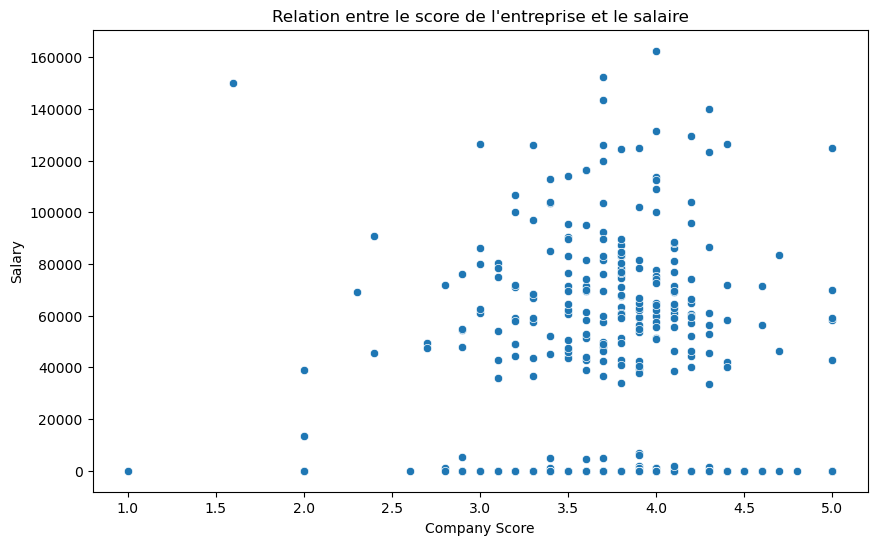

In [11]:
# 3.1 Classement des entreprises par score
company_score = df.groupby('Company')['Company Score'].mean().sort_values(ascending=False).head(10)
company_score.plot(kind='bar', figsize=(10, 6))
plt.title('Classement des entreprises par score')
plt.ylabel('Score moyen')
plt.show()

# 3.2 Relation entre le score et le salaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Score', y='Salary', data=df)
plt.title('Relation entre le score de l\'entreprise et le salaire')
plt.show()


# Analyse des titres de postes

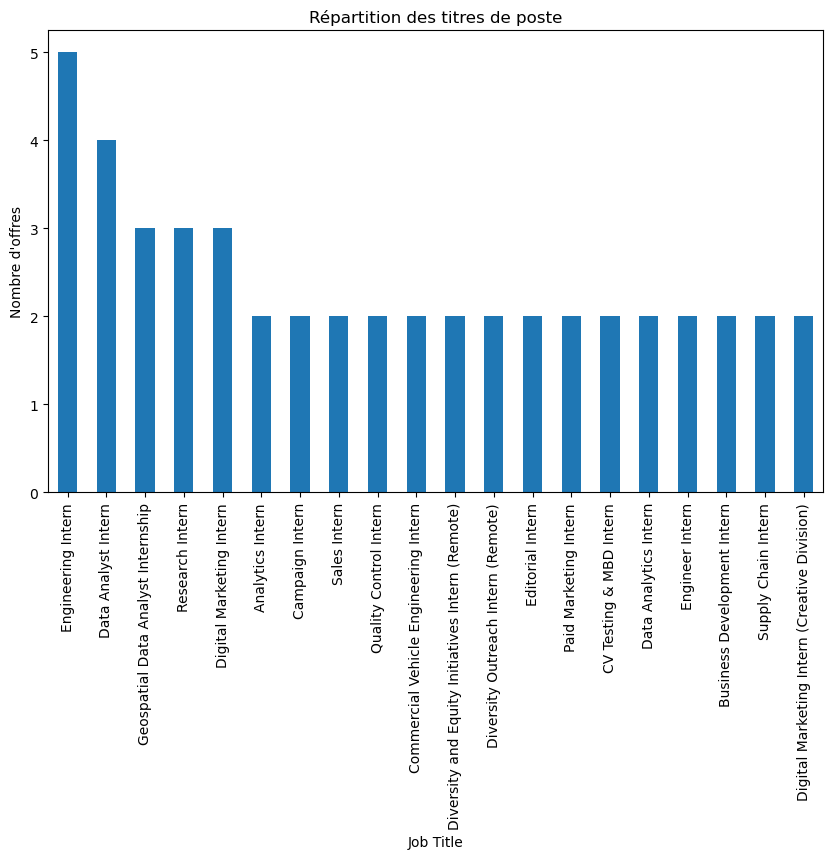

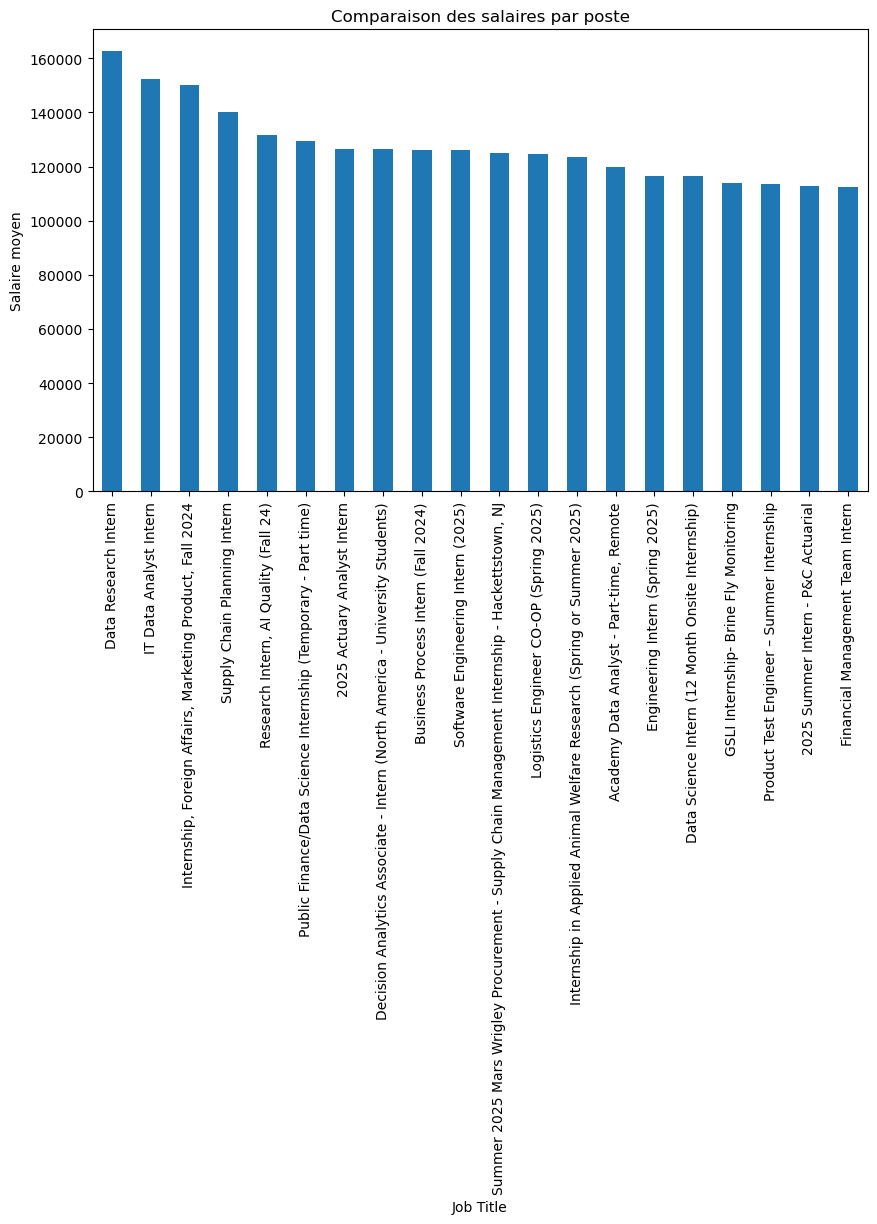

In [12]:
# 4. Analyse des titres de poste

# 4.1 Répartition des postes
plt.figure(figsize=(18, 30))
job_title_distribution = df['Job Title'].value_counts()
job_title_distribution.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Répartition des titres de poste')
plt.ylabel('Nombre d\'offres')
plt.show()

# 4.2 Comparaison des salaires par poste
salary_by_job = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)
salary_by_job.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison des salaires par poste')
plt.ylabel('Salaire moyen')
plt.show()



#  Analyse des tendances

In [85]:
# # Tendances des stages d'été vs stages d'automne
# df['Internship Season'] = df['Job Title'].apply(lambda x: 'Summer' if 'Summer' in x else ('Fall' if 'Fall' in x else 'Other'))
# salary_by_season = df.groupby('Internship Season')['Salary'].mean()
# salary_by_season.plot(kind='bar', figsize=(10, 6))
# plt.title('Comparaison des salaires des stages d\'été vs stages d\'automne')
# plt.ylabel('Salaire moyen')
# plt.show()


In [86]:
# # 6. Analyse des estimations d'employeur vs estimations Glassdoor

# # 6.1 Comparaison des estimations
# df['Estimation Type'] = df['Salary'].apply(lambda x: 'Employer' if 'Employer est.' in str(x) else ('Glassdoor' if 'Glassdoor est.' in str(x) else 'Other'))
# salary_by_estimation = df.groupby('Estimation Type')['Salary'].mean()
# salary_by_estimation.plot(kind='bar', figsize=(10, 6))
# plt.title('Comparaison des salaires: Estimation Employeur vs Glassdoor')
# plt.ylabel('Salaire moyen')
# plt.show()
